<https://compneuro.neuromatch.io/tutorials/W0D1_PythonWorkshop1/student/W0D1_Tutorial1.html>

# Lesson 1

## LIF Model

### The leaky-integrate-and-fire (LIF) neuron

The membrane equation describes the time evolution of the membrane potential $V(t)$ in response to synaptic input and the leakage of charge across the cell membrane. This type of phenomenon occurs in nature and is mathematically described by an ordinary differential equation (ODE), a concept we will explore further in the coming days.

The neuron's membrane potential $V(t)$ increases with incoming current $I(t)$. When $V(t)$ reaches a certain threshold $ V_th $, the neuron 'fires', which means it generates a spike and the membrane potential is reset to $V_{reset}$.


$$ \tau_m \frac{d}{dt} V(t) = E_L - V(t) + R \; I(t) \;\;,\textbf{if}\;\; V(t) \leq V_{th}$$

$$ V(t) = V_{reset} \;\;\textbf{otherwise}$$

where $V(t)$ is the membrane potential, $\tau_m$ is the membrane time constant, $E_{L}$ is the leak potential, $R$ is the membrane resistance, $I(t)$ is the synaptic input current, $V_{th}$ is the firing threshold, and $V_{reset}$ is the reset voltage. We can also write $V_m$ for membrane potential, which is more convenient for plot labels.



Integrate the potential:
$$ \tau_m \frac{V(t + \Delta t)-V(t)}{\Delta t}  = E_L - V(t) + R \; I(t) = K(t)$$

then,

$$ V(t + \Delta t) = V(t) +\Delta t \frac{K(t)}{\tau_m}$$ 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
E_L = -60e-3      # milivolt
V_r = -70e-3      # milivolt
V_th = -50e-3     # milivolt
R = 100e6        # ohm
i_mean = 25e-11  # ampere

In [43]:
i_mean = 25e-11
def generate_time_array(t_init=0,tmax=150e-3,dt=1e-3):
    return np.arange(t_init, tmax, dt)

def sinusoidal_current(time_array, i_mean):
    constant = 2 * (np.pi / 0.01)
    
    # Adding Gaussian noise with mean 0 and standard deviation 0.1 times the mean value
    noise = np.random.normal(0, 0.2 * i_mean, time_array.shape)
    
    return i_mean * (1 + np.sin(constant * time_array))+noise

def potential(time_array,current,tau,E_L,R,V_th,V_r,dt):
    V_t = np.zeros(time_array.shape[0])
    V_t[0] = E_L
    
    for i in range(1,V_t.shape[0]):
        if V_t[i-1] + (dt/tau)*(E_L-V_t[i-1] + R*current[i-1])>V_th:
            V_t[i] = V_r
        
        else:
            V_t[i] = V_t[i-1] + (dt/tau)*(E_L-V_t[i-1] + R*current[i-1])
        
    return V_t

In [44]:
time_array = generate_time_array()

neuro_current = sinusoidal_current(time_array,i_mean)

V_t = potential(time_array,neuro_current,tau,E_L,R,V_th,V_r,dt)


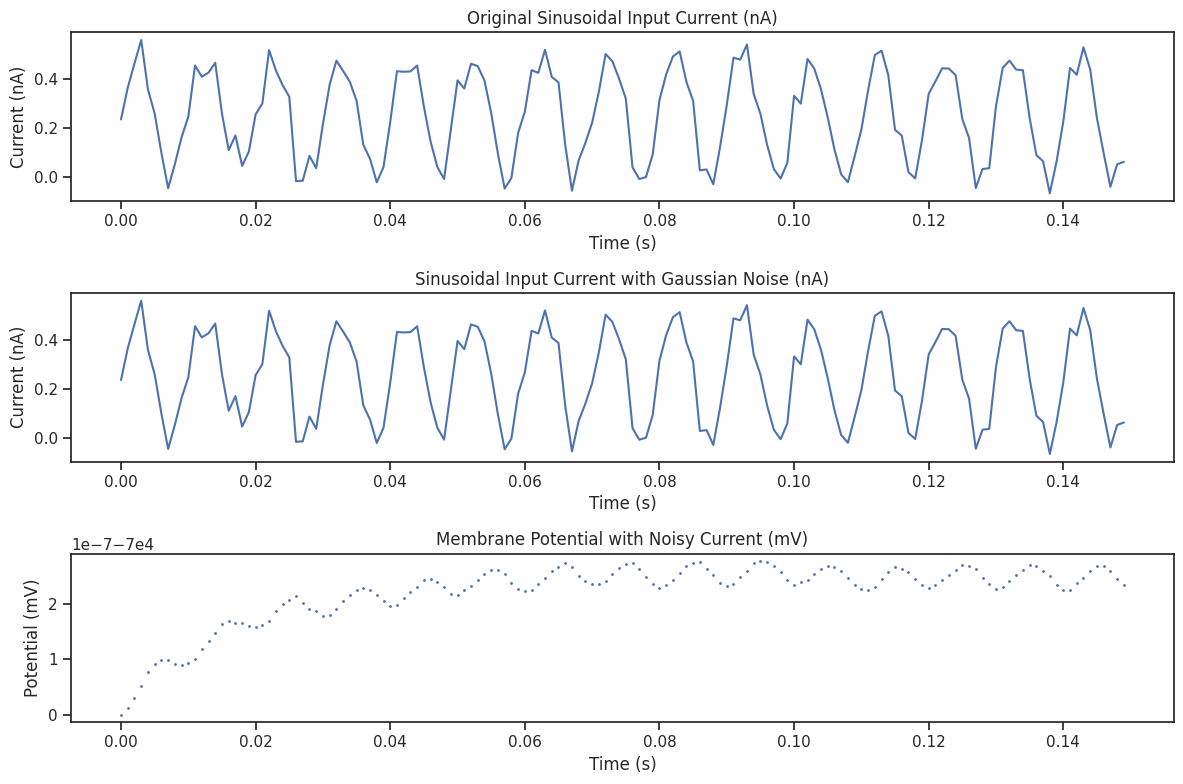

In [45]:
# Plot the results with noise
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time_array, neuro_current * 1e9)  # Plot the original current for comparison
plt.title('Original Sinusoidal Input Current (nA)')
plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

plt.subplot(3, 1, 2)
plt.plot(time_array, neuro_current * 1e9)  # Convert amperes to nanoamperes for plotting
plt.title('Sinusoidal Input Current with Gaussian Noise (nA)')
plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

plt.subplot(3, 1, 3)
plt.plot(time_array, V_t * 1e3,'b.', markersize=2)  # Convert volts to millivolts for plotting
plt.title('Membrane Potential with Noisy Current (mV)')
plt.xlabel('Time (s)')
plt.ylabel('Potential (mV)')

plt.tight_layout()
plt.show()

## The LIF Neuron Class

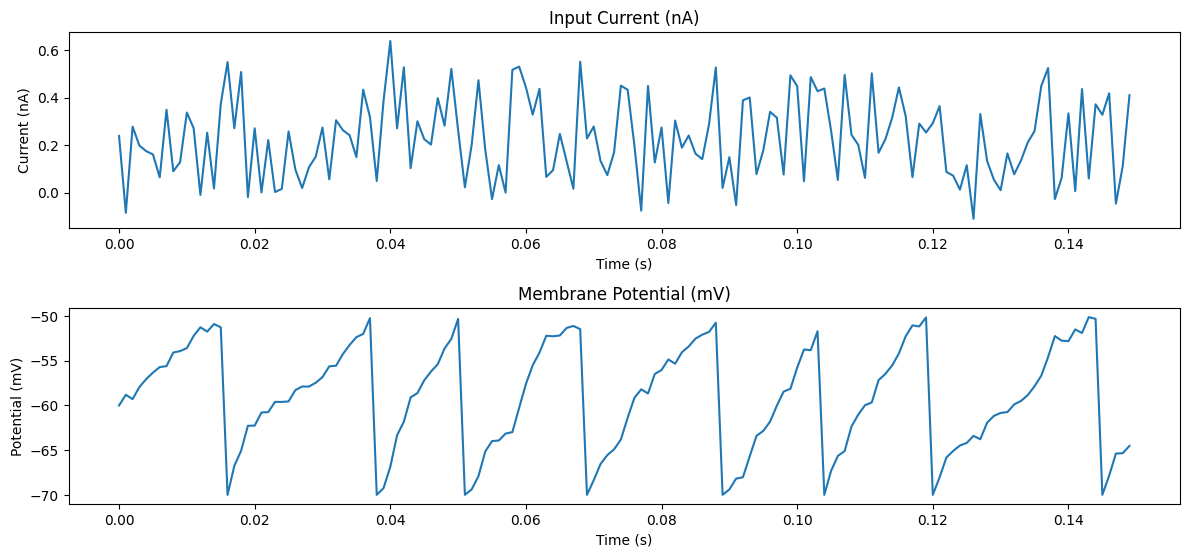

In [5]:
class LIF_Neuron:
    def __init__(self, tau, E_L, V_r, V_th, R, i_mean, dt, t_max):
        self.tau = tau
        self.E_L = E_L
        self.V_r = V_r
        self.V_th = V_th
        self.R = R
        self.i_mean = i_mean
        self.dt = dt
        self.t_max = t_max
        self.time_array = np.arange(0, self.t_max, self.dt)
        self.V_t = np.zeros(self.time_array.shape[0])
        self.V_t[0] = self.E_L  # Initialize with resting potential
        
    def sinusoidal_current(self):
        constant = 2 * (np.pi / 0.01)
        noise = np.random.normal(0, 0.1 * self.i_mean, self.time_array.shape)
        current = self.i_mean * (1 + np.sin(constant * self.time_array)) + noise
        return current
    
    def random_current(self):
        np.random.seed(2)
        constant = 0.1*np.sqrt(self.t_max/self.dt)
        uniform = np.random.uniform(-1,1,size=time_array.shape)
        noise = np.random.normal(0, 0.1 * self.i_mean, self.time_array.shape)
        current = self.i_mean * (1 + constant*uniform) + noise
        return current

    def update_potential(self, current):
        
        for i in range(1, self.V_t.shape[0]):
            self.V_t[i] = self.V_t[i-1] + self.dt * (self.E_L - self.V_t[i-1] + self.R * current[i-1]) / self.tau
            if self.V_t[i] >= self.V_th:
                self.V_t[i] = self.V_r
        return self.V_t
    
    def plot_results(self, current):
        plt.figure(figsize=(12, 8))
        plt.subplot(3, 1, 1)
        plt.plot(self.time_array, current * 1e9)  # Convert to nanoamperes
        plt.title('Input Current (nA)')
        plt.xlabel('Time (s)')
        plt.ylabel('Current (nA)')

        plt.subplot(3, 1, 2)
        plt.plot(self.time_array, self.V_t * 1e3)  # Convert to millivolts
        plt.title('Membrane Potential (mV)')
        plt.xlabel('Time (s)')
        plt.ylabel('Potential (mV)')

        plt.tight_layout()
        plt.show()

# Parameters
tau = 20e-3      # second
E_L = -60e-3     # millivolt
V_r = -70e-3     # millivolt
V_th = -50e-3    # millivolt
R = 100e6        # ohm
i_mean = 25e-11  # ampere
dt = 1e-3        # second
t_max = 150e-3   # second

# Create a Neuron instance
neuron = LIF_Neuron(tau, E_L, V_r, V_th, R, i_mean, dt, t_max)

# Generate current and update potential
current = neuron.random_current()
neuron.update_potential(current)

# Plot the results
neuron.plot_results(current)


# Lesson 2:  LIF Neuron Part II

It'll be introduced spikes in our LIF neuron and evaluate the refractory period’s effect in spiking dynamics!

## Section 1: Histograms

A histogram is a visual representation of the distribution of quantitative data. The term was first introduced by Karl Pearson, one of the fathers of biostatistics.

### How to construct a Histogram

Histograms give a rough sense of the density of the underlying distribution of the data, and often for density estimation: estimating the probability density function of the underlying variable. The total area of a histogram used for probability density is always normalized to 1. If the length of the intervals on the x-axis are all 1, then a histogram is identical to a relative frequency plot.

The first step to build a histogram is to "bin" (or "bucket") the range of values— divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) are adjacent and are typically (but not required to be) of equal size.

### Histogram isn't a bar chart

In a histogram, each bin is for a different range of values, so altogether the histogram illustrates the distribution of values. But in a bar chart, each bar is for a different category of observations (e.g., each bar might be for a different population), so altogether the bar chart can be used to compare different categories. Some authors recommend that bar charts always have gaps between the bars to clarify that they are not histograms.


In [18]:
import numpy as np
import pandas as pd
np.random.seed(1)
# Define the intervals and their corresponding frequencies
intervals = [(-3.5, -2.51), (-2.5, -1.51), (-1.5, -0.51), (-0.5, 0.49), (0.5, 1.49), (1.5, 2.49), (2.5, 3.49)]
frequencies = [9, 32, 109, 180, 132, 34, 4]

# Generate random data within each interval based on the frequency
example_data = []
for (low, high), freq in zip(intervals, frequencies):
    # Generate 'freq' number of random values within the current interval
    example_data.extend(np.random.uniform(low, high, freq))

# Shuffle the data to ensure randomness in order
np.random.shuffle(example_data)

# Optionally, convert to a numpy array
example_data = np.array(example_data)

example_data = pd.DataFrame(example_data, columns=["signal"])
# Print or use the data
print(example_data)

       signal
0    1.353723
1    0.502988
2    0.242522
3    0.969264
4   -0.795590
..        ...
495  0.318844
496  0.745256
497 -0.648572
498 -0.180546
499 -0.944580

[500 rows x 1 columns]


<Axes: ylabel='Count'>

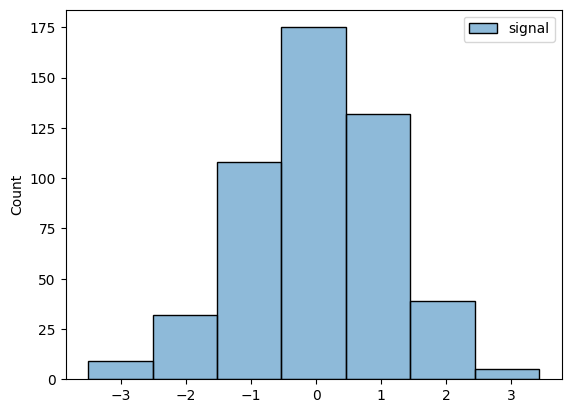

In [19]:
import seaborn as sns

# sns.histplot(data,bins)
sns.histplot(data=example_data,bins=7)

### The Seaborn Histogram and KDE

KDE stands for Kernel Density Estimation. It's a statistical technique used to estimate the probability density function (PDF) of a random variable in a non-parametric way. KDE provides a smooth estimate of the data distribution, which can be more informative and visually appealing than a simple histogram.

<Axes: ylabel='Count'>

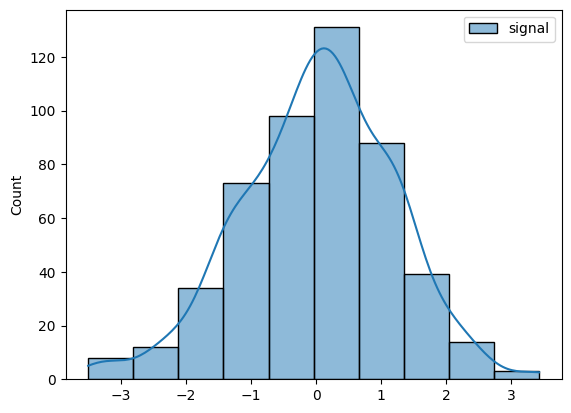

In [20]:
sns.histplot(data=example_data,bins=10,kde=True)

## Cumulative Histogram

<Axes: ylabel='Count'>

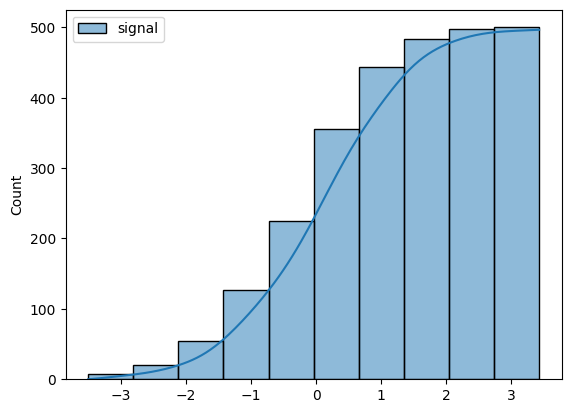

In [26]:
sns.histplot(data=example_data,bins=10,kde=True, cumulative=True)

$$N = \sum_{j=1}^{J} m_j$$

## KDE plot

<Axes: xlabel='signal', ylabel='Density'>

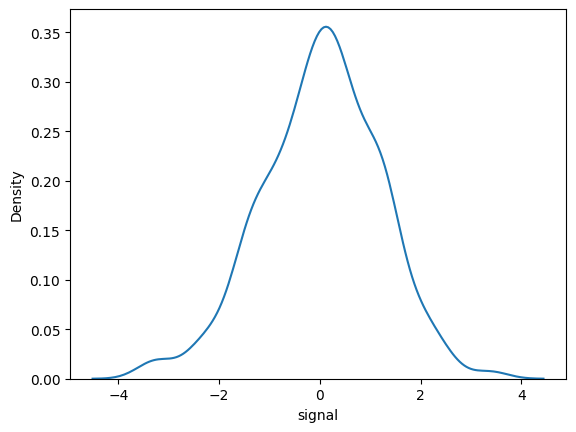

In [23]:
sns.kdeplot(data=example_data, x = "signal")

## Cumulative KDE plot

<Axes: xlabel='signal', ylabel='Density'>

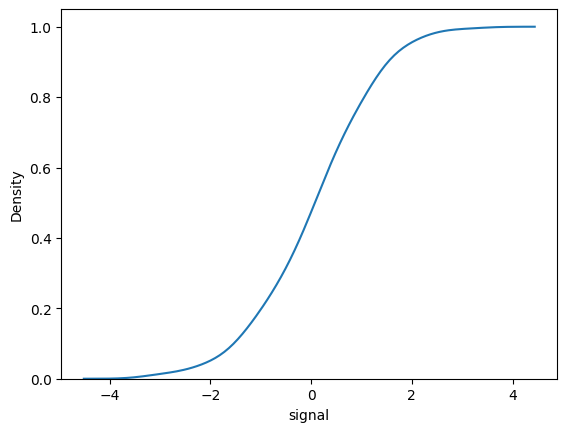

In [25]:
sns.kdeplot(data=example_data, x = "signal", cumulative=True)

### Histogram Template

/tmp/ipykernel_17982/586458739.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data,


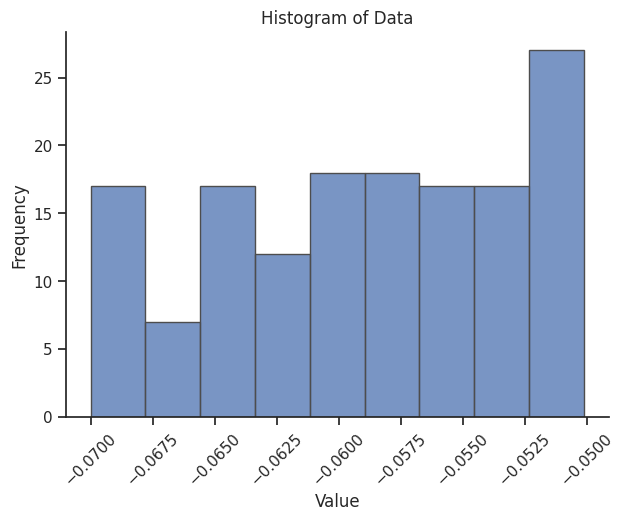

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

data = neuron.V_t

# Create the histogram
sns.histplot(data,
             kde=False,
             palette="light:m_r",
             edgecolor=".3")  # Set kde to False if you don't want the density curve

plt.xticks(rotation=45)

plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

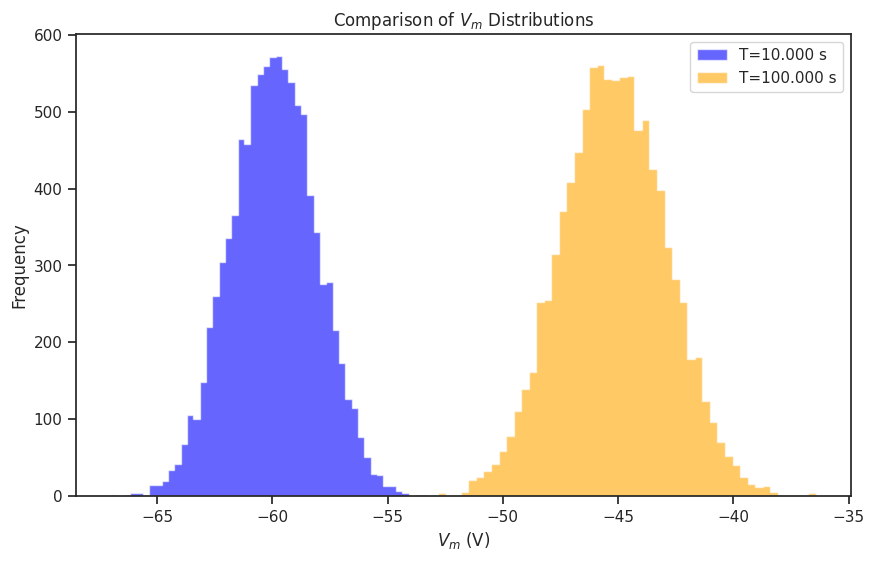

In [32]:
# Constants definitions
import numpy as np
import matplotlib.pyplot as plt

# Constants definitions
t_max = 100  # maximum time
dt = 1       # time step
E_L = -70    # Resting membrane potential in mV
i_mean = 25  # Mean current
tau = 20     # Time constant
R = 1        # Resistance

# Set random number generator
np.random.seed(2020)

# Initialize t_range, step_end, n, v_n, i and nbins
t_range = np.arange(0, t_max + dt, dt)
step_end = len(t_range)
n = 10000
v_n = E_L * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))
nbins = 50

# Loop over time steps
for step, t in enumerate(t_range):
    if step == 0:
        continue
    v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (E_L - v_n[:, step - 1] + R * i[:, step])

# Sample two different time points
t1 = int(t_max * 0.1 / dt)  # Change this to the actual time point you're interested in
t2 = int(t_max / dt)  # Assuming the second histogram is at the last time step

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot the histograms
plt.hist(v_n[:, t1], bins=nbins, histtype='stepfilled', alpha=0.6, color='blue', label='T={:.3f} s'.format(t_range[t1]))
plt.hist(v_n[:, t2], bins=nbins, histtype='stepfilled', alpha=0.6, color='orange', label='T={:.3f} s'.format(t_range[t2]))

# Adding labels and title
plt.xlabel('$V_m$ (V)')
plt.ylabel('Frequency')
plt.title('Comparison of $V_m$ Distributions')

# Adding legend
plt.legend()

# Show the plot
plt.show()


In [37]:
v_n[0,:]

array([-70.        , -67.81652014, -66.65133032, -66.13917451,
       -65.48991897, -65.17303736, -64.72319263, -64.12874402,
       -62.26690948, -62.26181483, -62.29650598, -60.78897998,
       -59.40871868, -59.04912502, -58.74393623, -57.63973179,
       -57.7149936 , -56.92567647, -57.2689457 , -57.1061572 ,
       -55.36781466, -55.75603195, -55.04469761, -53.35329902,
       -52.92721642, -52.11169508, -52.92063158, -52.63430159,
       -53.1129581 , -52.76718778, -53.2045723 , -51.80369784,
       -51.78002855, -51.7417948 , -50.50891359, -49.86831527,
       -49.41624526, -48.77455793, -49.39134849, -48.29866102,
       -48.27779651, -47.28523741, -46.51117375, -45.38638762,
       -46.44063467, -47.2281894 , -46.77454435, -46.54657791,
       -47.23942723, -47.31331592, -47.1640996 , -47.63245066,
       -47.25327808, -47.84017931, -48.19601411, -49.16522719,
       -48.79616569, -47.51627689, -46.63289394, -46.05798637,
       -46.10162636, -45.64045852, -44.98427149, -44.90

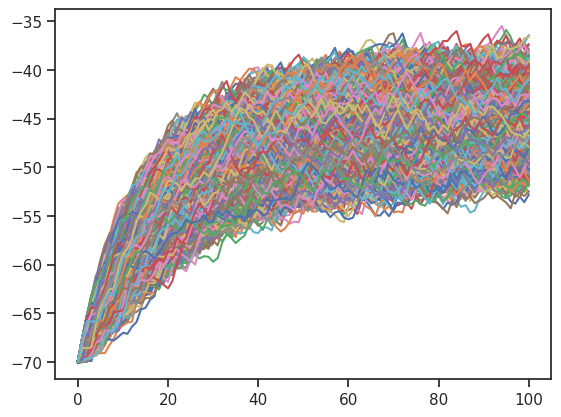

In [39]:

for i in range(0,n):
    plt.plot(t_range,v_n[i,:])

In [6]:
neuron.V_t

array([-0.06      , -0.05880733, -0.05928913, -0.05793692, -0.05705038,
       -0.05632428, -0.0557036 , -0.05559565, -0.05407319, -0.05391827,
       -0.05358051, -0.05221835, -0.05125239, -0.05173599, -0.05088909,
       -0.05125417, -0.07      , -0.06675621, -0.06506469, -0.06227625,
       -0.06225314, -0.06078739, -0.06074188, -0.05959967, -0.0596046 ,
       -0.05954449, -0.05827974, -0.0578784 , -0.05788502, -0.05745742,
       -0.05682864, -0.05561811, -0.05555636, -0.05425557, -0.05322736,
       -0.0523585 , -0.05199373, -0.05022937, -0.07      , -0.06925382,
       -0.06686427, -0.06333508, -0.06181566, -0.05909075, -0.0586194 ,
       -0.05718721, -0.05620294, -0.05538202, -0.05362563, -0.05253577,
       -0.05030901, -0.07      , -0.06938588, -0.06790888, -0.06515135,
       -0.06398754, -0.0639215 , -0.06314586, -0.06298508, -0.06025539,
       -0.05759402, -0.05550008, -0.05408555, -0.0521999 , -0.0522579 ,
       -0.05217052, -0.05132674, -0.05110208, -0.05146248, -0.07